In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("BiocParallel")

BiocManager::install('mixOmics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BH’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite',
  'vroom', 'waldo', 'whisker', 'xfun', 'xml2', 'zip', 'boot', 'class',
  'foreign', 'KernSmooth', 'MASS', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories",

In [2]:
# Charger les packages

library(mixOmics)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.24.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [3]:
install.packages("WallomicsData")
library(WallomicsData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [5]:
library("matrixStats")

In [6]:

data("Altitude_Cluster")
data("Ecotype")
data("Genetic_Cluster")
data("Metabolomics_Rosettes")
data("Metabolomics_Stems")
data("Metadata")
data("Phenomics_Rosettes")
data("Phenomics_Stems")
data("Proteomics_Rosettes_CW")
data("Proteomics_Stems_CW")
data("Transcriptomics_Rosettes")
data("Transcriptomics_Rosettes_CW")
data("Transcriptomics_Stems")
data("Transcriptomics_Stems_CW")
data("Temperature")

In [7]:
head(Metadata)

,Acc_number,Functional_classes,Protein_families,Putative_functions
,<chr>,<chr>,<chr>,<chr>
1,AT4G39640,Unknown function,,gamma-glutamyltransferase
2,AT4G16260,Proteins acting on cell wall polysaccharides,glycoside hydrolase (GH),"glycoside hydrolase family 17 - GH17 (beta-1,3-glucosidase)"
3,AT5G47550,Proteins with interaction domains (with proteins or polysaccharides),protease inhibitor,"proteinase inhibitor family I25 (phytostatin) (cystatin family, I25.033, MEROPS) (AtCYS-5)"
4,AT5G45280,Proteins acting on cell wall polysaccharides,carbohydrate esterase (CE),carbohydrate esterase family 13 - CE13 (pectin acylesterase - PAE) (AtPAE11)
5,AT2G16430,Miscellaneous,purple acid phosphatase (PAP),purple acid phosphatase (AtPAP10)
6,AT1G30600,Proteases,Ser protease,"Ser protease (subtilisin) (AtSBT2.1, ALE1) (Peptidase family S08.A03, MEROPS)"


###Exploratory Data Analysis:
handleing missing values in each data frame using median imputation

In [8]:
for(i in 1:ncol(Metabolomics_Stems)){Metabolomics_Stems[,i][is.na(Metabolomics_Stems[,i])]<-median(Metabolomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Phenomics_Stems)){Phenomics_Stems[,i][is.na(Phenomics_Stems[,i])]<-median(Phenomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Proteomics_Stems_CW)){Proteomics_Stems_CW[,i][is.na(Proteomics_Stems_CW[,i])]<-median(Proteomics_Stems_CW[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems)){Transcriptomics_Stems[,i][is.na(Transcriptomics_Stems[,i])]<-median(Transcriptomics_Stems[,i],na.rm=TRUE)}

for(i in 1:ncol(Transcriptomics_Stems_CW)){Transcriptomics_Stems_CW[,i][is.na(Transcriptomics_Stems_CW[,i])]<-median(Transcriptomics_Stems_CW[,i],na.rm=TRUE)}


###handling nonzero var

In [9]:
my_nearZeroVar<-nearZeroVar(Transcriptomics_Stems)
#head(my_nearZeroVar$Metrics)
Transcriptomics_Stems <- Transcriptomics_Stems[,-which(colnames(Transcriptomics_Stems)%in%rownames(my_nearZeroVar$Metrics))]


###checking distributions of our omics

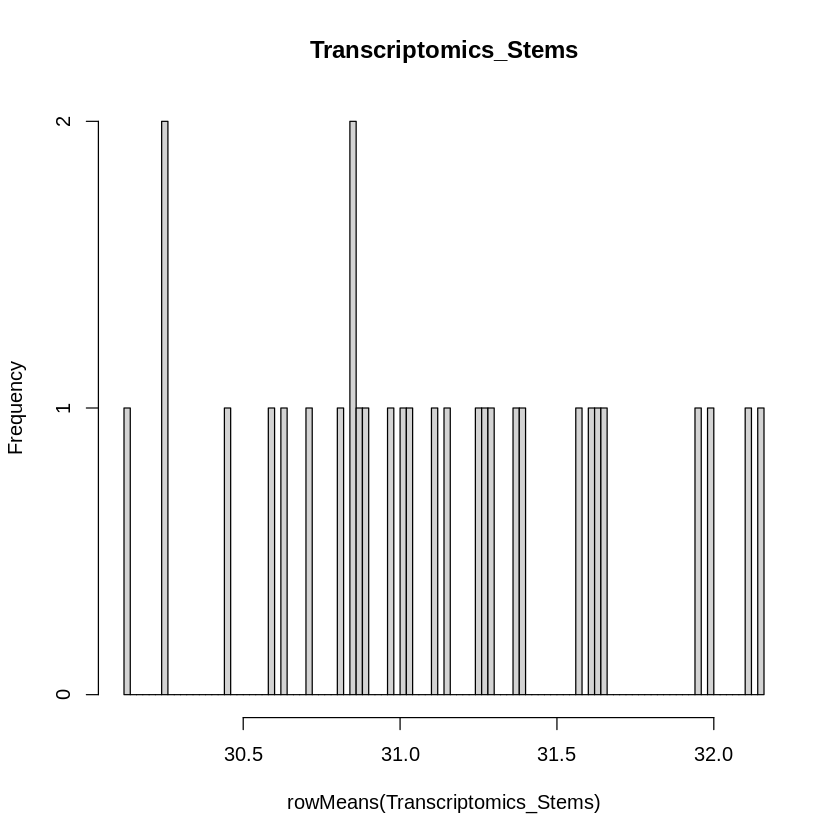

In [10]:
hist(rowMeans(Transcriptomics_Stems),breaks = 100, main = "Transcriptomics_Stems")


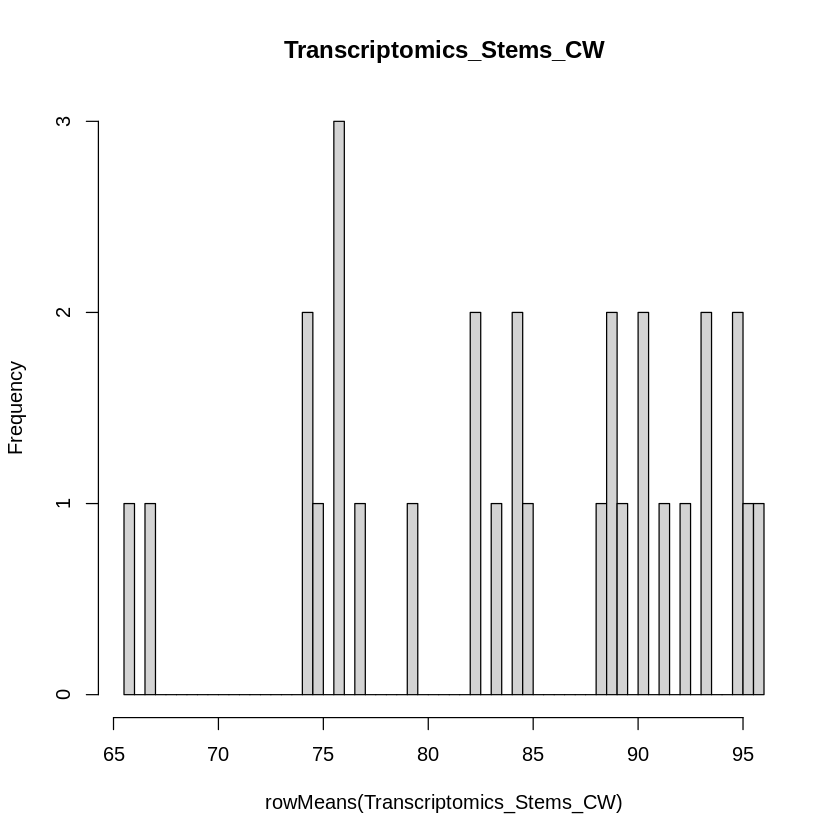

In [11]:
hist(rowMeans(Transcriptomics_Stems_CW), breaks = 100,main = "Transcriptomics_Stems_CW")


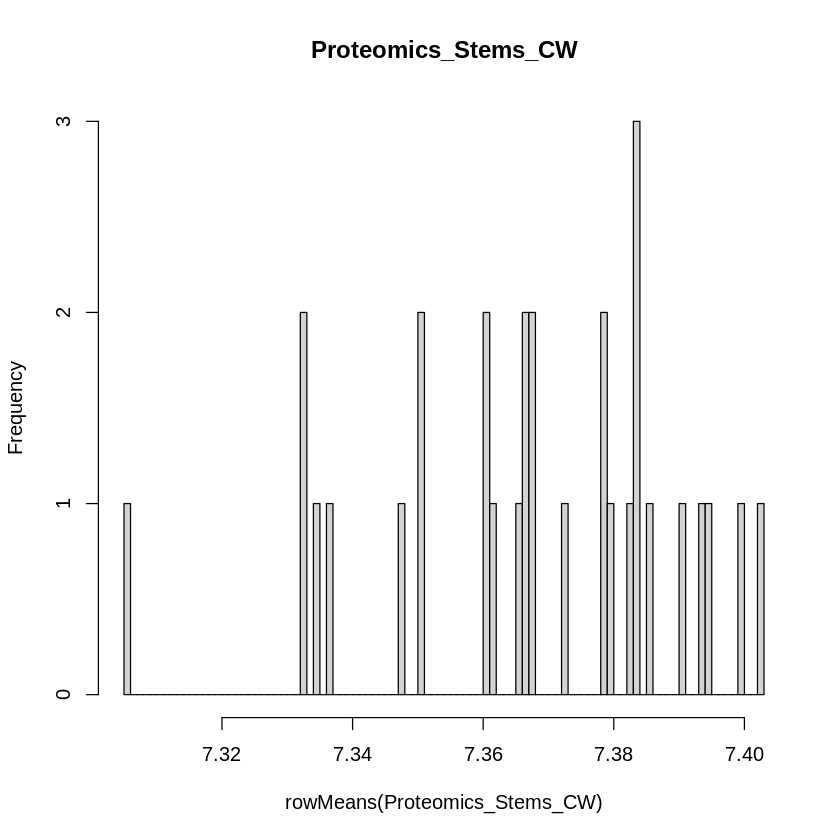

In [12]:
hist(rowMeans(Proteomics_Stems_CW),breaks=100, main = "Proteomics_Stems_CW")


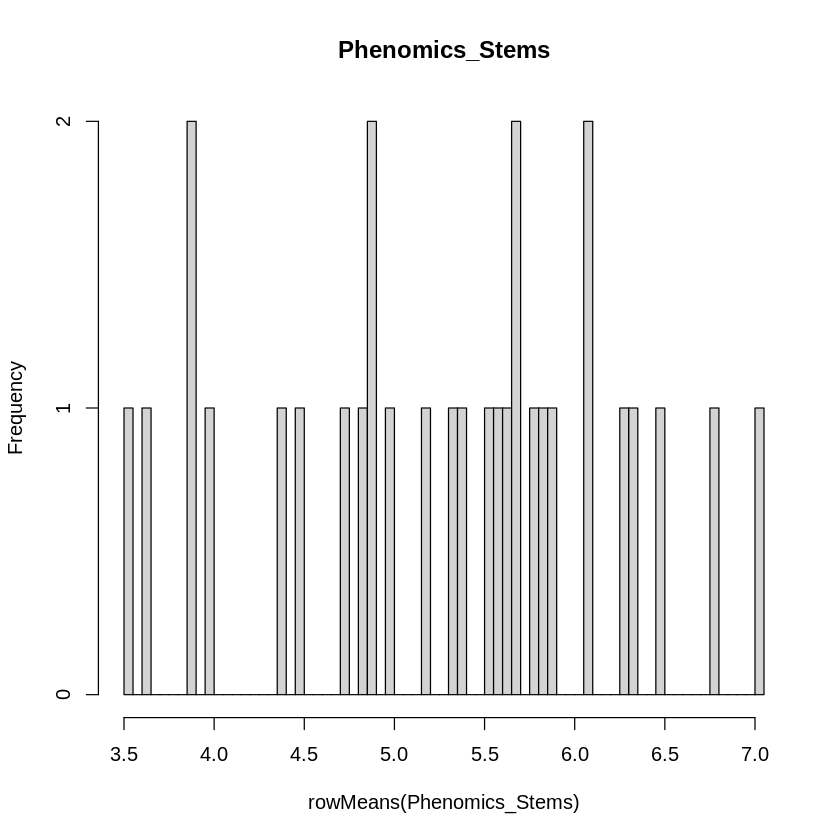

In [13]:
hist(rowMeans(Phenomics_Stems),breaks=100, main = "Phenomics_Stems")


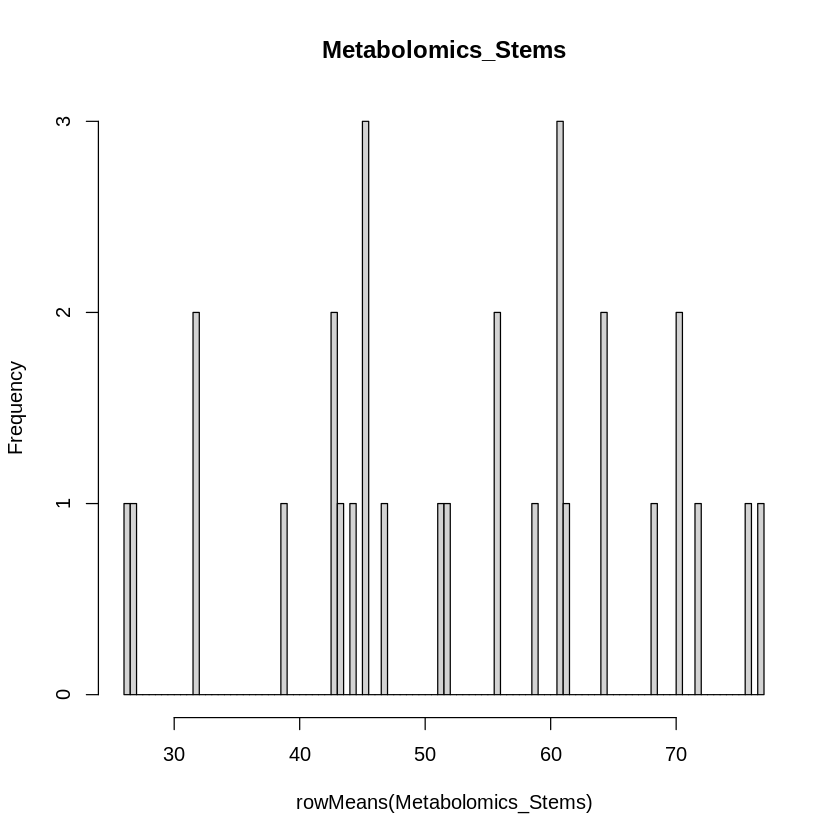

In [14]:
hist(rowMeans(Metabolomics_Stems),breaks=100, main = "Metabolomics_Stems")


We conclude that while scRNAseq data looks fairly Gaussian (or at least exponential), we should probably model the scBSseq and scATACseq data following Bernoulli distribution as they look quite bimodal indicating the binary nature of the data, i.e. methylated vs. unmethylated for scBSseq and open vs. close for scATACseq. To make the scBSseq and scATACseq data purely Bernoulli-like, we will further make the scBSseq and scATACseq data sets binary by encoding values below 50 as 0 and above 50 as 1. Since binary data typically have vey low variation compared to continuous data, we need to remove low-variance features in this case again:

###MOFA 

In [15]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MOFA2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'MOFA2'

also installing the dependencies ‘sitmo’, ‘filelock’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘RcppTOML’, ‘here’, ‘png’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘S4Arrays’, ‘MatrixGenerics’, ‘FNN’, ‘RcppAnnoy’, ‘irlba’, ‘RcppProgress’, ‘dqrng’, ‘dir.expiry’, ‘basilisk.utils’, ‘rhdf5’, ‘pheatmap’, ‘cowplot’, ‘reticulate’, ‘HDF5Array’, ‘corrplot’, ‘DelayedArray’, ‘Rtsne’, ‘uwot’, ‘basilisk’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite',
  'vroom', 'waldo', 'whisker', 'xf

Data is stored as a list of matrices. Features are stored in the rows and samples in the columns



In [16]:
library(MOFA2)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [17]:
omics<-list(Proteomics_CW=t(as.matrix(Proteomics_Stems_CW)),Transcriptomics_CW=t(as.matrix(Transcriptomics_Stems_CW)),Transcriptomics=t(as.matrix(Transcriptomics_Stems)),Phenomics=t(as.matrix(Phenomics_Stems)),Metabolomics=t(as.matrix(Metabolomics_Stems)))
lapply(omics,dim)

$Proteomics_CW
[1] 414  30

$Transcriptomics_CW
[1] 414  30

$Transcriptomics
[1] 22540    30

$Phenomics
[1]  4 30

$Metabolomics
[1]  6 30

In [18]:
MOFAobject <- create_mofa(data=omics)
MOFAobject

Creating MOFA object from a list of matrices (features as rows, sample as columns)...


Warning message in .rename_duplicated_features(object):
“There are duplicated features names across different views. We will add the suffix *_view* only for those features 
            Example: if you have both TP53 in mRNA and mutation data it will be renamed to TP53_mRNA, TP53_mutation”


Untrained MOFA model with the following characteristics: 
 Number of views: 5 
 Views names: Proteomics_CW Transcriptomics_CW Transcriptomics Phenomics Metabolomics 
 Number of features (per view): 414 414 22540 4 6 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 30 
 

Visualise the number of views (rows) and the number of groups (columns) exist, what are their corresponding dimensionalities and how many missing information they have (grey bars).

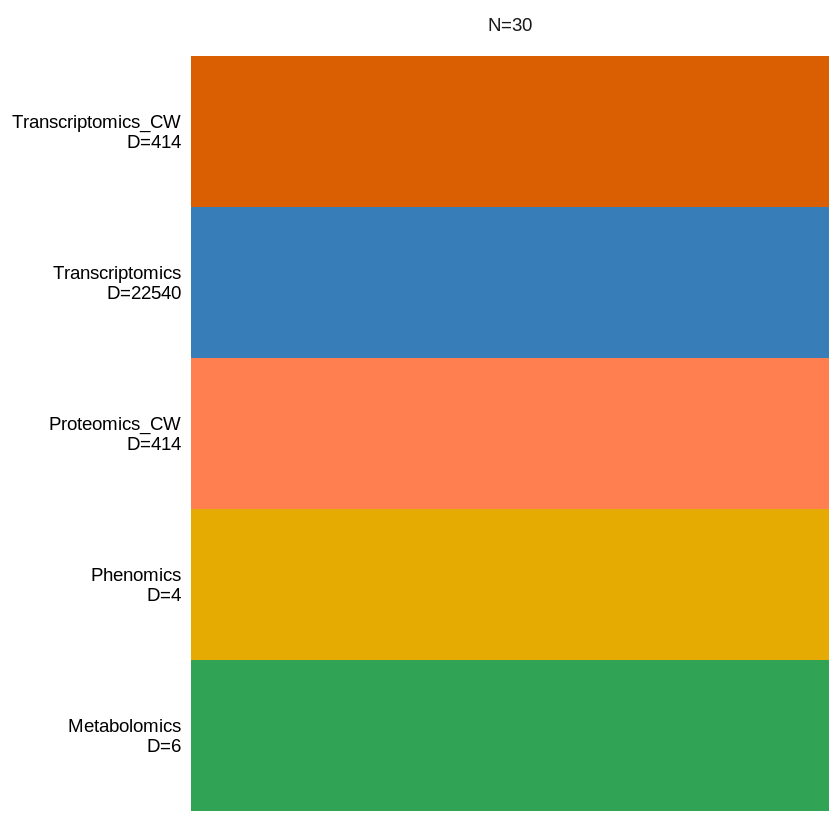

In [19]:
plot_data_overview(MOFAobject)


Now we will use some model training parameters such as distribution types corresponding to each OMIC, number of iterations, number of factors to be computed etc.



In [20]:
data_opts <- get_default_data_options(MOFAobject)
#data_opts$scale_views<-TRUE
#data_opts$scale_groups<-TRUE

head(data_opts)

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] TRUE

$views
[1] "Proteomics_CW"      "Transcriptomics_CW" "Transcriptomics"   
[4] "Phenomics"          "Metabolomics"      

$groups
[1] "group1"

In [21]:
ModelOptions <- get_default_model_options(MOFAobject)
#ModelOptions$spikeslab_factors<-TRUE
#ModelOptions$spikeslab_weights<-TRUE
#ModelOptions$ard_factors<-TRUE
ModelOptions$num_factors <- 15

ModelOptions

$likelihoods
     Proteomics_CW Transcriptomics_CW    Transcriptomics          Phenomics 
        "gaussian"         "gaussian"         "gaussian"         "gaussian" 
      Metabolomics 
        "gaussian" 

$num_factors
[1] 15

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] FALSE

$ard_factors
[1] FALSE

$ard_weights
[1] TRUE

Finally, we are ready to run MOFA using default opt


In [22]:
MOFAobject <- prepare_mofa(MOFAobject,model_options=ModelOptions )
print(MOFAobject)

Warning message in prepare_mofa(MOFAobject, model_options = ModelOptions):
“Some view(s) have less than 15 features, MOFA will have little power to to learn meaningful factors for these view(s)....”
Warning message in prepare_mofa(MOFAobject, model_options = ModelOptions):
“Some view(s) have a lot of features, it is recommended to perform a more stringent feature selection before creating the MOFA object....”
Checking data options...

No data options specified, using default...

No training options specified, using default...

Checking model options...

Warning message in prepare_mofa(MOFAobject, model_options = ModelOptions):
“The total number of samples is very small for learning 15 factors.  
    Try to reduce the number of factors to obtain meaningful results. It should not exceed ~7.”


Untrained MOFA model with the following characteristics: 
 Number of views: 5 
 Views names: Proteomics_CW Transcriptomics_CW Transcriptomics Phenomics Metabolomics 
 Number of features (per view): 414 414 22540 4 6 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 30 
 


In [23]:
MOFAobject <-run_mofa(MOFAobject, outfile = NULL, save_data = FALSE, use_basilisk = TRUE)


Warning message in run_mofa(MOFAobject, outfile = NULL, save_data = FALSE, use_basilisk = TRUE):
“No output filename provided. Using /tmp/RtmpVRHXrf/mofa_20230507-140528.hdf5 to store the trained model.

”
Connecting to the mofapy2 package using basilisk. 
    Set 'use_basilisk' to FALSE if you prefer to manually set the python binary using 'reticulate'.

+ '/root/.cache/R/basilisk/1.12.0/0/bin/conda' 'create' '--yes' '--prefix' '/root/.cache/R/basilisk/1.12.0/MOFA2/1.10.0/mofa_env' 'python=3.10.5' '--quiet' '-c' 'conda-forge'

+ '/root/.cache/R/basilisk/1.12.0/0/bin/conda' 'install' '--yes' '--prefix' '/root/.cache/R/basilisk/1.12.0/MOFA2/1.10.0/mofa_env' 'python=3.10.5'

+ '/root/.cache/R/basilisk/1.12.0/0/bin/conda' 'install' '--yes' '--prefix' '/root/.cache/R/basilisk/1.12.0/MOFA2/1.10.0/mofa_env' '-c' 'conda-forge' 'python=3.10.5' 'python=3.10.5' 'numpy=1.23.1' 'scipy=1.8.1' 'pandas=1.4.3' 'h5py=3.6.0' 'scikit-learn=1.1.1' 'dtw-python=1.2.2'



In [25]:
# rename features change 
features_names(MOFAobject)[["Proteomics_CW"]]<-names(Proteomics_Stems_CW)
features_names(MOFAobject)[["Transcriptomics_CW"]]<-names(Transcriptomics_Stems_CW)
features_names(MOFAobject)[["Transcriptomics"]]<-names(Transcriptomics_Stems)

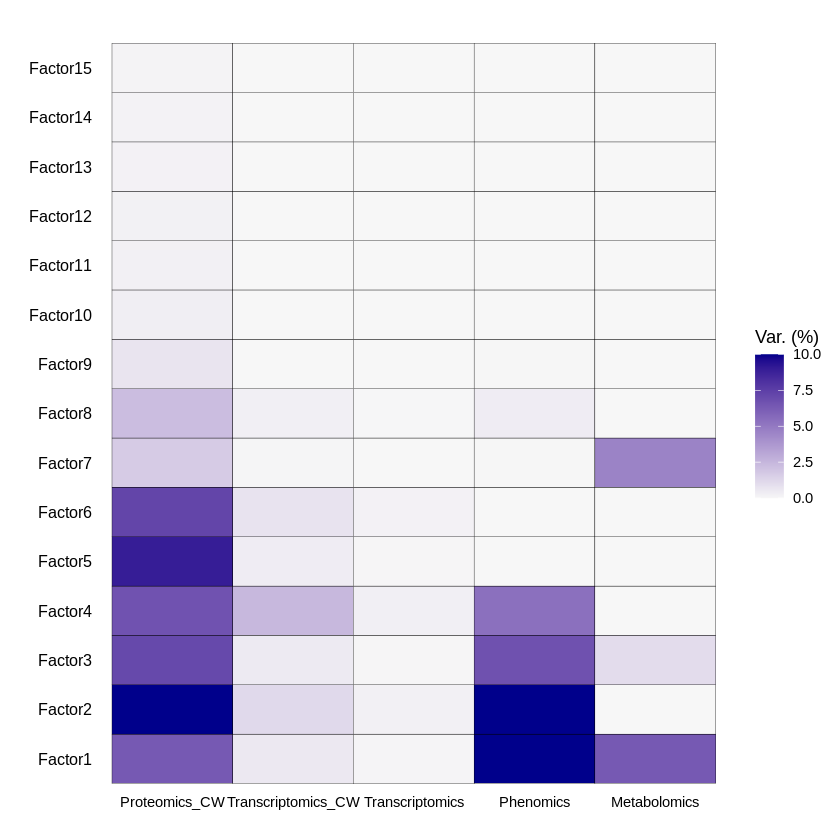

In [26]:
plot_variance_explained(MOFAobject,max_r2=10)


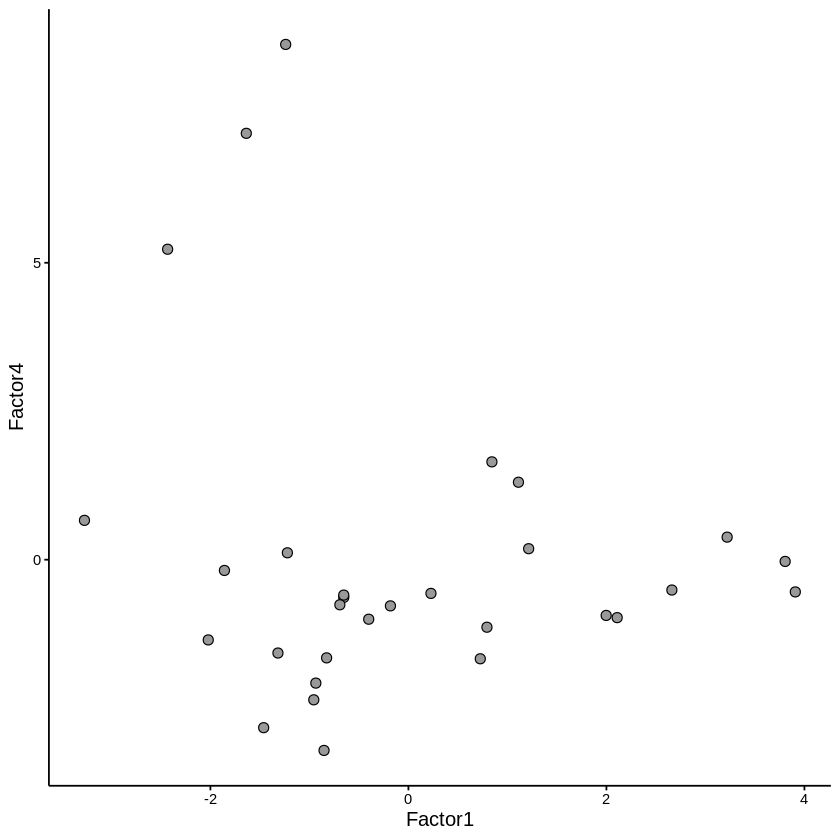

In [27]:
plot_factors(MOFAobject, 
  factors = c(1,4), 
  dot_size = 2.5
)

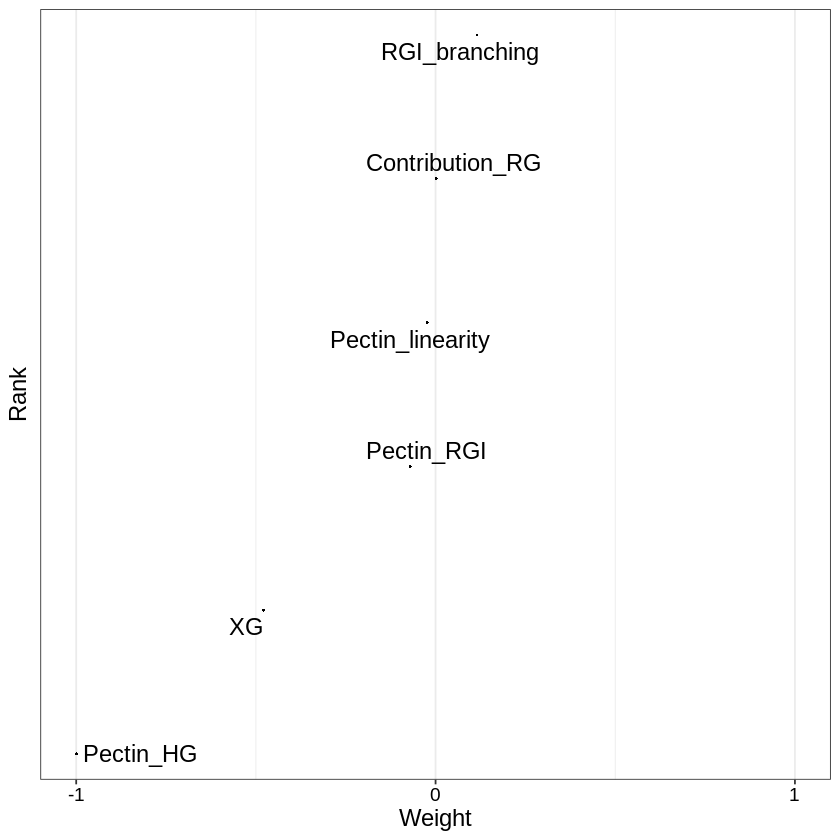

In [28]:
plot_weights(MOFAobject,
 view = "Metabolomics",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

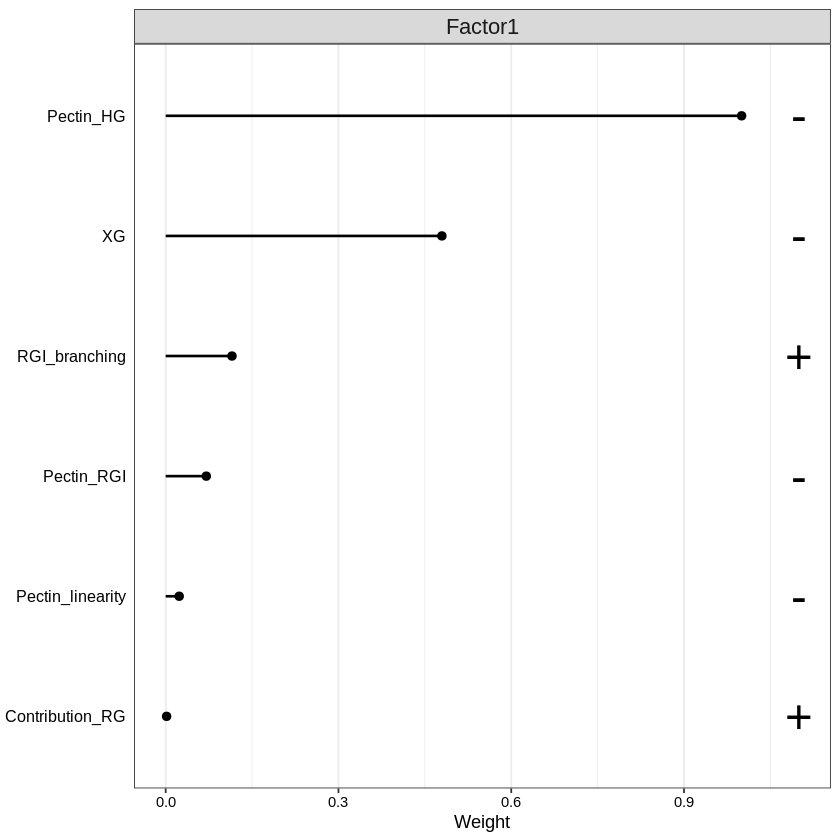

In [29]:
plot_top_weights(MOFAobject,
 view = "Metabolomics",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

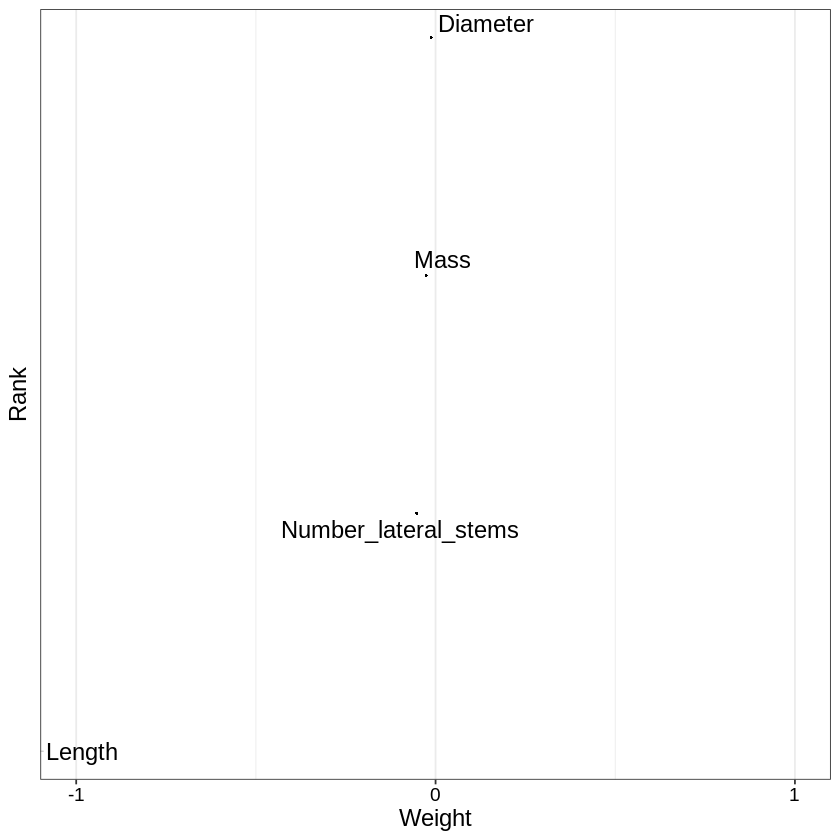

In [30]:
plot_weights(MOFAobject,
 view = "Phenomics",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

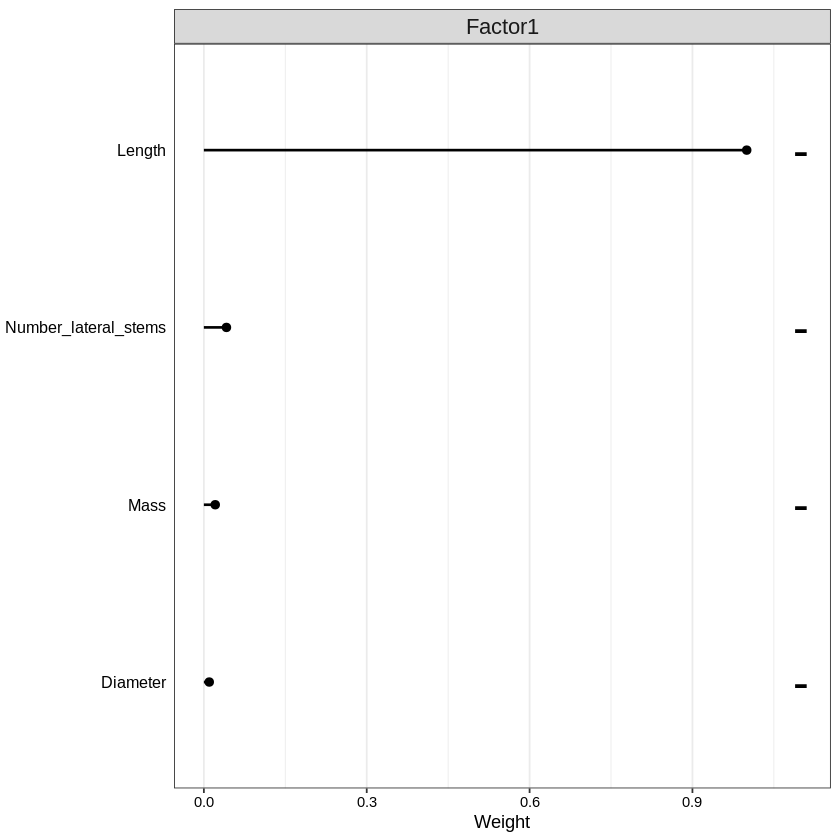

In [31]:
plot_top_weights(MOFAobject,
 view = "Phenomics",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

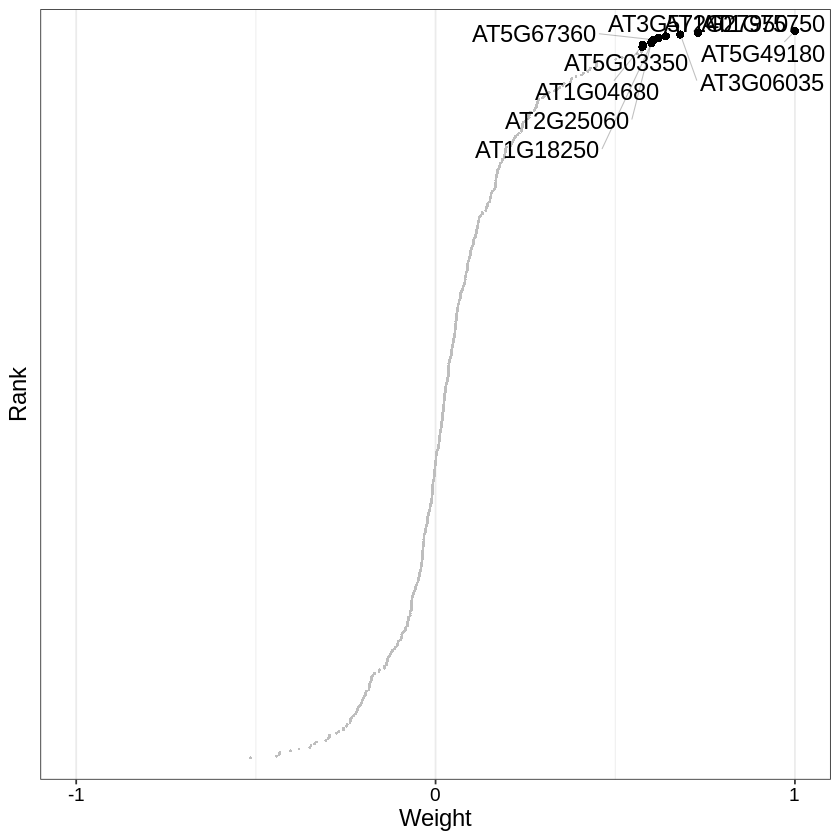

In [32]:
plot_weights(MOFAobject, 
  view = "Transcriptomics_CW", 
  factor = 1, 
  nfeatures = 10
)

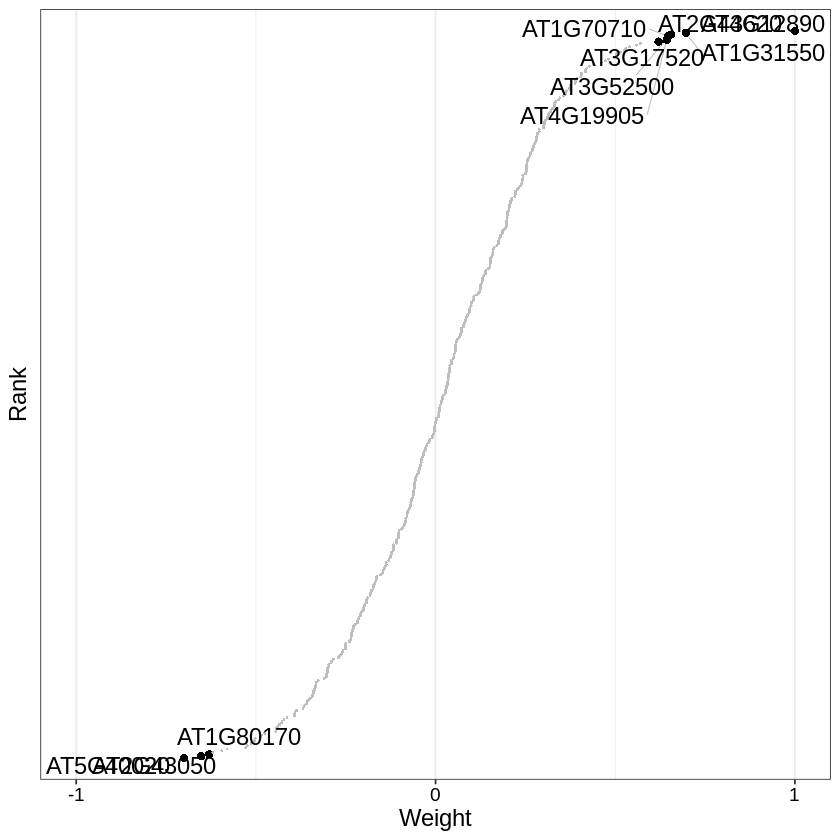

In [33]:

plot_weights(MOFAobject, 
  view = "Proteomics_CW", 
  factor = 1, 
  nfeatures = 10
)

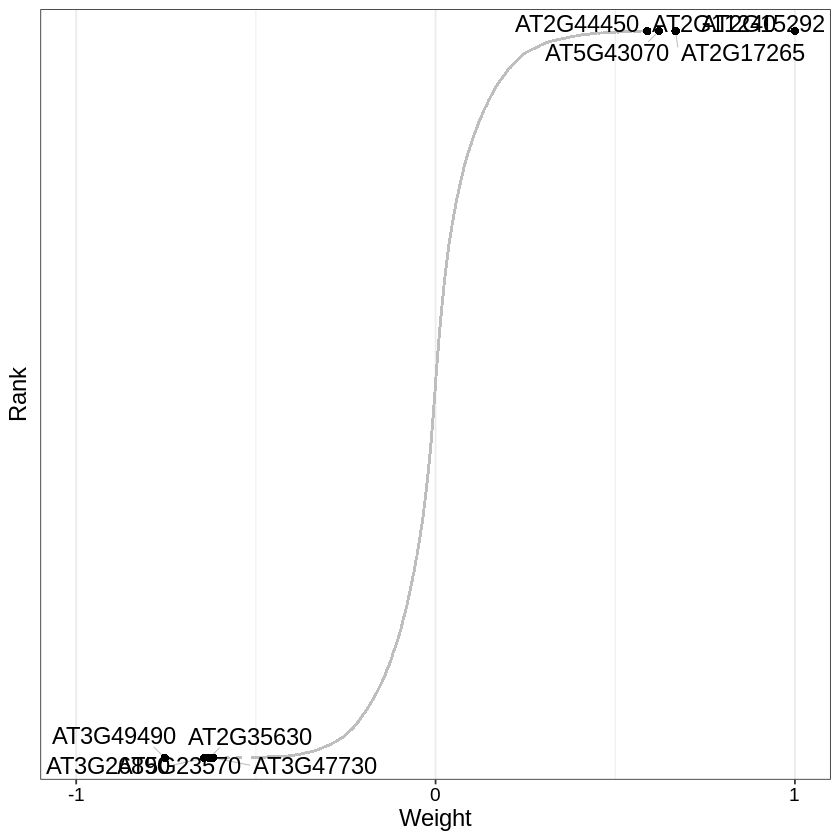

In [34]:

plot_weights(MOFAobject, 
  view = "Transcriptomics", 
  factor = 1, 
  nfeatures = 10
)

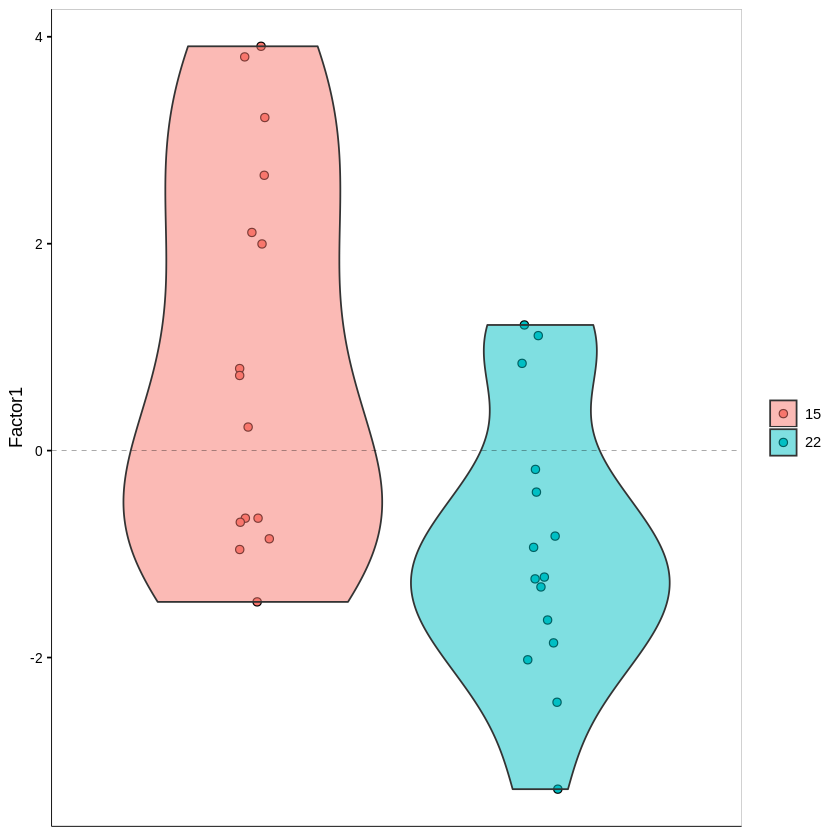

In [36]:
plot_factor(MOFAobject, 
  factors = 1, 
  color_by = Temperature,
  add_violin = TRUE,
  dodge = TRUE,
  show_missing = FALSE
)

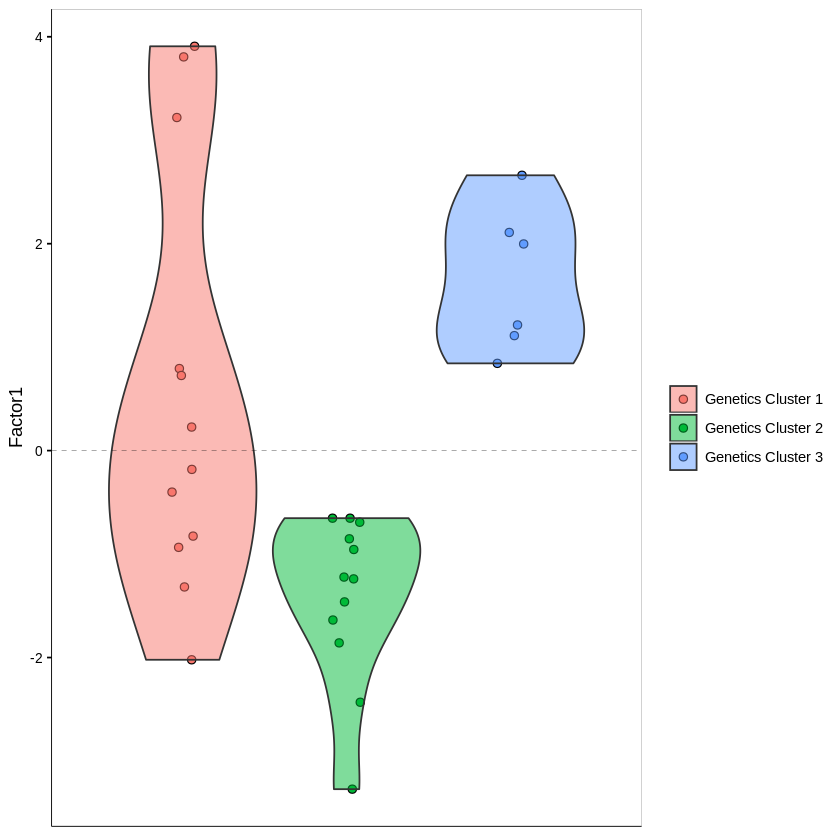

In [37]:
plot_factor(MOFAobject, 
  factors = 1, 
  color_by = Genetic_Cluster,
  add_violin = TRUE,
  dodge = TRUE,
  show_missing = FALSE
)

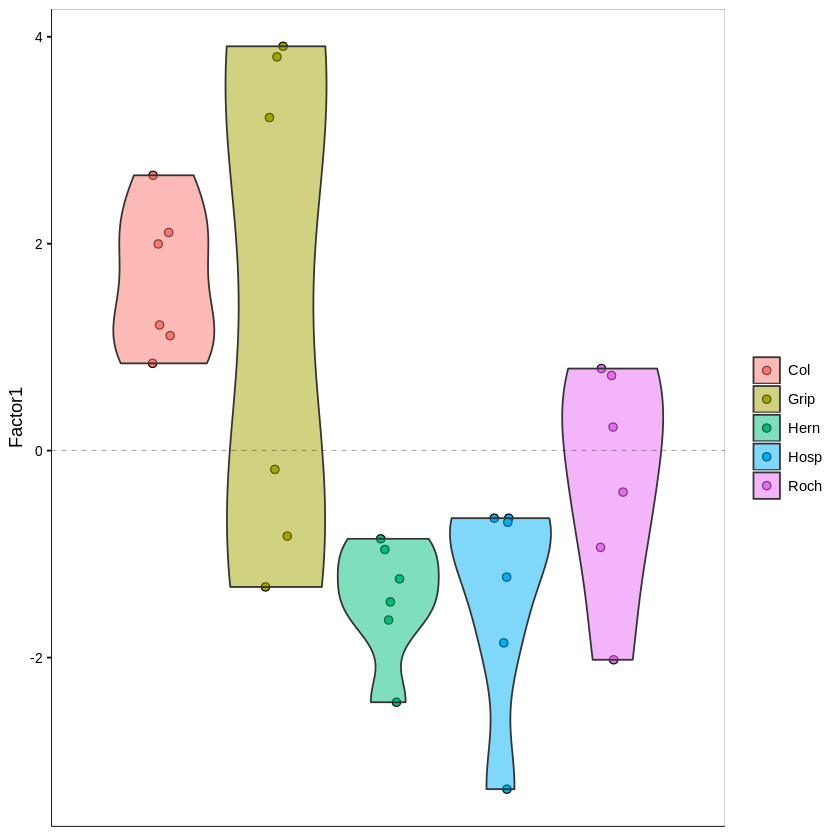

In [38]:
plot_factor(MOFAobject, 
  factors = 1, 
  color_by = Ecotype,
  add_violin = TRUE,
  dodge = TRUE,
  show_missing = FALSE
)

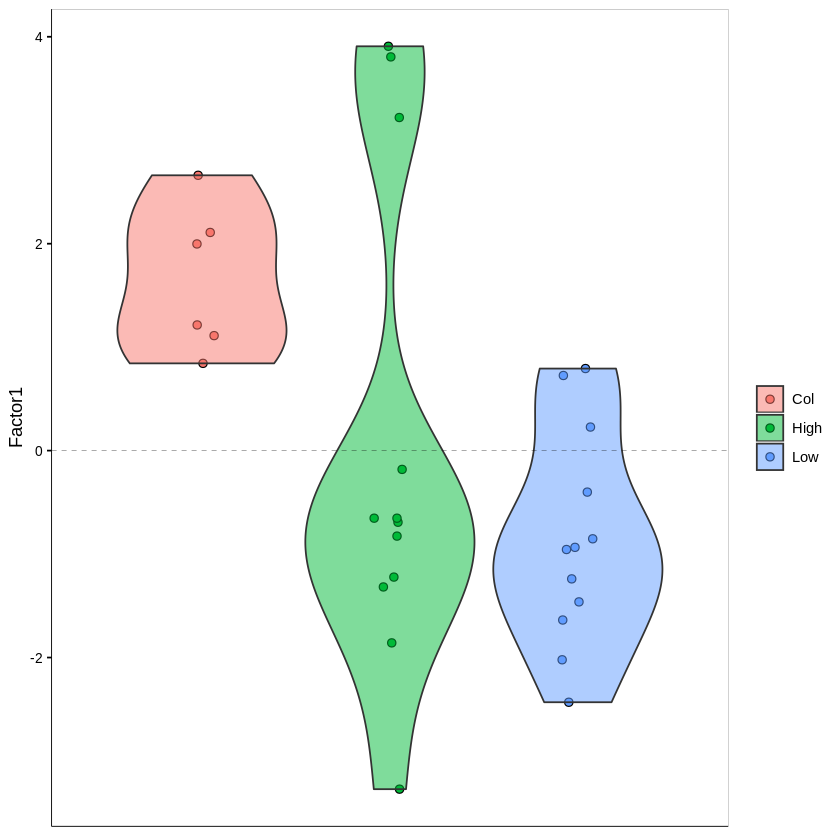

In [39]:
plot_factor(MOFAobject, 
  factors = 1, 
  color_by = Altitude_Cluster,
  add_violin = TRUE,
  dodge = TRUE,
  show_missing = FALSE
)